In [185]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [9.50, 3.50]
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

warnings.filterwarnings("ignore")

In [186]:
file = "ExtractedFeatures.csv"
file1 = "Ex_ArcSwipe_Scoring_Rules.csv"

In [187]:
data = pd.read_csv(file)
data.drop(columns=['Unnamed: 0'], inplace=True)

data1 = pd.read_csv(file1, header=None)

In [188]:
data.head()

,Session id,Time Step,Current trainee score at that time,Number of tennis balls knocked over by operator,Number of barrels knocked over,Number of barrels touches,Number of equipment collisions,Number of poles that fell over,Number of poles touched,Number of times user had to restart an arc,...,Tracks Ground Pressure Rear Right,Safety violation bucket over truck cab,Safety violation dump truck contact,Safety violation electrical lines,Safety violation human contact,Safety violation load over human,Safety violation unsafe parking position,Safety violation Flipped Vehicle,Exercise Number of goals met,Exercise Time
0,5efb51adbcf5631c1400b415,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.216817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,5efb51adbcf5631c1400b415,1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.172409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.983333
2,5efb51adbcf5631c1400b415,2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.128039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.983333
3,5efb51adbcf5631c1400b415,3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.083706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.983333
4,5efb51adbcf5631c1400b415,4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.039411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.983333


In [189]:
sessions = data["Session id"].unique()
print(f"Total Number of Session: {len(sessions)}")

Total Number of Session: 40


In [190]:
def duration_of_session(session : str) -> int:
    duration = data.loc[data["Session id"]==session, "Time Step"]
    return len(duration)
    

2000 48 596.4


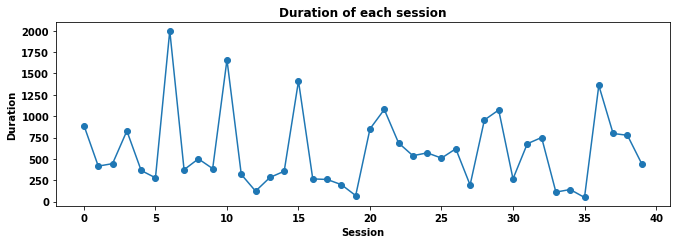

In [191]:
def session_v_duration_plot():
    all_sessions = [i for i in range(len(sessions))]
    durations = list(map(duration_of_session, sessions))
    print(max(durations), min(durations), mean(durations))
    
    plt.title("Duration of each session", fontweight="bold")
    plt.xlabel("Session")
    plt.ylabel("Duration")
    plt.plot(all_sessions, durations, '-o')
    
session_v_duration_plot()    

In [192]:
print("All Features")
print(data.columns[3:])

All Features
Index(['Number of tennis balls knocked over by operator',
       'Number of barrels knocked over', 'Number of barrels touches',
       'Number of equipment collisions', 'Number of poles that fell over',
       'Number of poles touched', 'Number of times user had to restart an arc',
       'Average time out of path range', 'Current path time out of range',
       'Average score per path', 'Current path score', 'Average time per path',
       'Current path time', 'Total time out of path', 'Total path time',
       'Wind speed', 'Collisions with environment', 'Bucket Angle',
       'Bucket Height', 'Bucket Self Contact', 'Engine Average Power',
       'Current Engine Power', 'Engine Torque', 'Engine Torque Average',
       'Fuel Consumption Rate Average', 'Fuel Consumption',
       'Number of times machine was left idling',
       'Total time machine was left idling',
       'Ratio of time that operator runs equipment vs idle time',
       'Engine RPM (%)', 'Engine RPM Averag

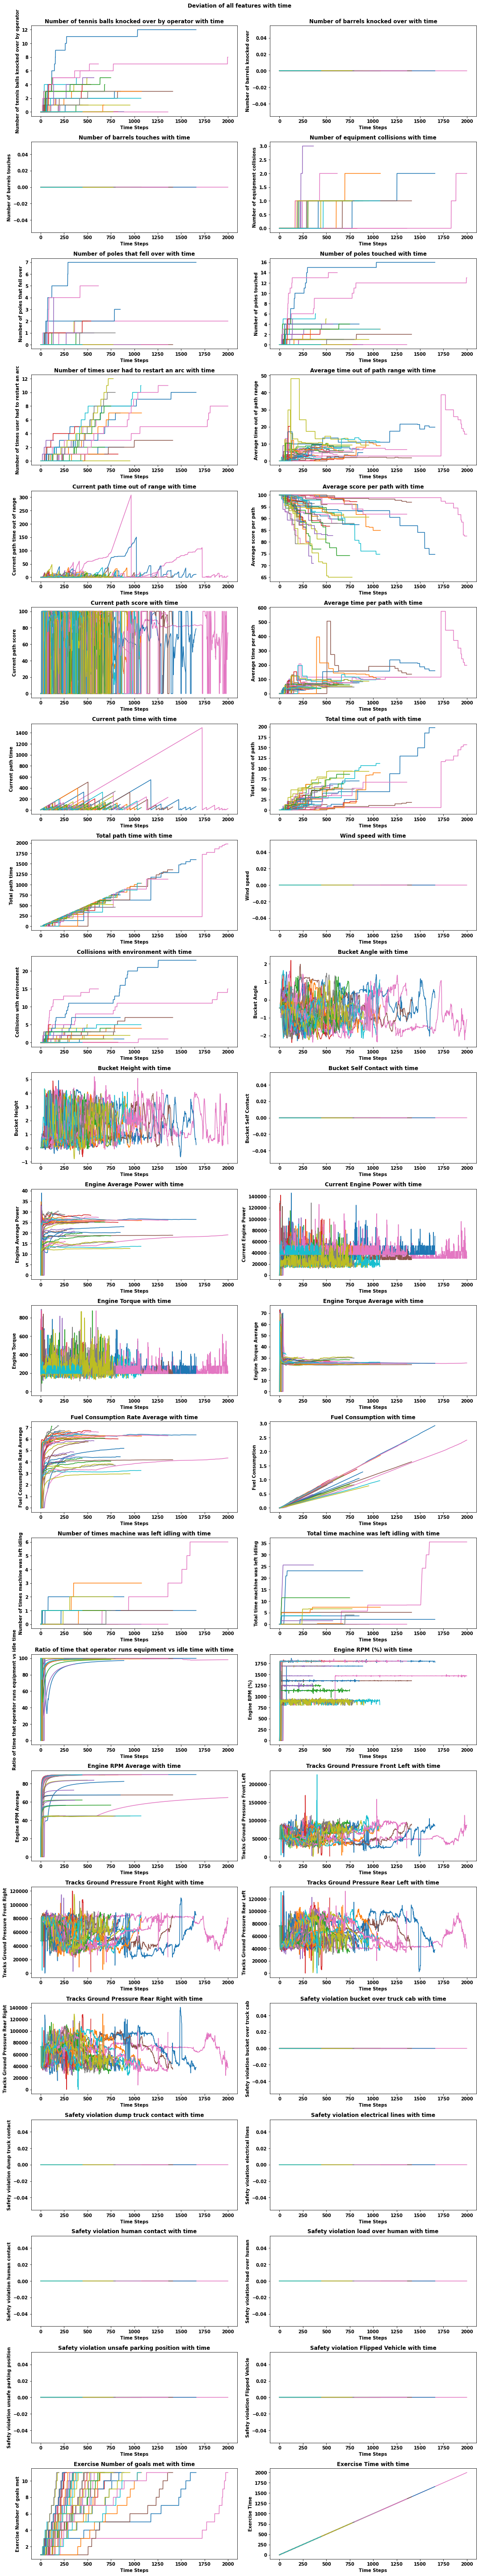

In [193]:
def deviation_of_features_with_time(features, axis):
    
    axis.set_title(f"{features} with time", fontweight="bold")
    axis.set_xlabel(f"Time Steps")
    axis.set_ylabel(f"{features}")
    
    for sess in sessions:
        values = data.loc[data["Session id"]==sess, features]
        time_steps = data.loc[data["Session id"]==sess, "Time Step"]
        
        axis.plot(time_steps, values)
    
    
def show_deviation_all_features_with_time():
    fig, ax = plt.subplots(len(data.columns[3:])//2, 2)
    fig.set_figheight(80)
    fig.set_figwidth(15)
    fig.suptitle("Deviation of all features with time", y=1.0, fontweight="bold")
    
    for i, feat in enumerate(data.columns[3:]):
        deviation_of_features_with_time(feat, ax[i//2,i%2]) 
        
    plt.show()    
        
show_deviation_all_features_with_time()        
        
        

#### Features to skip based on the visualization 
##### Reason - Zero value for all time steps
* Safety Violation unsafe parking position
* Safety violation flipped vehicle
* Safety violation human contact
* Safety violation load over human
* Safety violation electric lines
* Safety violation dump truck contact
* Safety violation bucket over truck cab
* Bucket Self contact
* Wind speed
* Number of barrel touches
* Number of barrels knocked over
* Average score per path
* Current path score

In [194]:
features_to_skip = ['Safety violation unsafe parking position', 'Safety violation Flipped Vehicle', 'Safety violation human contact',
                    'Safety violation load over human', 'Safety violation electrical lines', 'Safety violation dump truck contact', 
                    'Safety violation bucket over truck cab', 'Bucket Self Contact', 'Wind speed', 'Number of barrels touches', 
                    'Number of barrels knocked over','Average score per path', 'Current path score']

print(f"Total Original Features: {len(data.columns[3:])}")
print(f"Total Features Removed: {len(features_to_skip)}")

data.drop(columns=features_to_skip, inplace=True)

Total Original Features: 44
Total Features Removed: 13


#### Remove Correlated features

Using correlated features are redundant information as they add the same information

In [195]:
data_corr = data.loc[:,data.columns[3:]].corr()
data_corr.head()

,Number of tennis balls knocked over by operator,Number of equipment collisions,Number of poles that fell over,Number of poles touched,Number of times user had to restart an arc,Average time out of path range,Current path time out of range,Average time per path,Current path time,Total time out of path,...,Total time machine was left idling,Ratio of time that operator runs equipment vs idle time,Engine RPM (%),Engine RPM Average,Tracks Ground Pressure Front Left,Tracks Ground Pressure Front Right,Tracks Ground Pressure Rear Left,Tracks Ground Pressure Rear Right,Exercise Number of goals met,Exercise Time
Number of tennis balls knocked over by operator,1.000000,0.268048,0.882550,0.950297,0.553588,0.419483,0.405045,0.502585,0.405043,0.336935,...,0.129600,0.126267,0.170165,0.142432,-0.187746,-0.001378,0.003958,0.184431,0.009101,0.539361
Number of equipment collisions,0.268048,1.000000,0.247402,0.232551,0.497967,0.377025,-0.027765,0.299771,-0.103478,0.617541,...,0.220894,0.082790,-0.073821,-0.024148,0.087811,-0.404582,0.391857,-0.091120,0.512431,0.454970
Number of poles that fell over,0.882550,0.247402,1.000000,0.896830,0.496565,0.389966,0.302955,0.359109,0.228547,0.319670,...,-0.002190,0.086667,0.229929,0.225432,-0.146286,-0.056675,0.057076,0.143036,0.023118,0.374868
Number of poles touched,0.950297,0.232551,0.896830,1.000000,0.529086,0.394493,0.452943,0.486765,0.465022,0.297164,...,0.164672,0.108881,0.170118,0.122030,-0.199219,0.018973,-0.010253,0.190433,-0.033933,0.536412
Number of times user had to restart an arc,0.553588,0.497967,0.496565,0.529086,1.000000,0.435727,0.190696,0.495424,0.280358,0.630152,...,0.149370,0.135919,0.023096,0.036488,0.101242,-0.132734,0.101878,-0.074665,0.432178,0.736710


<AxesSubplot:>

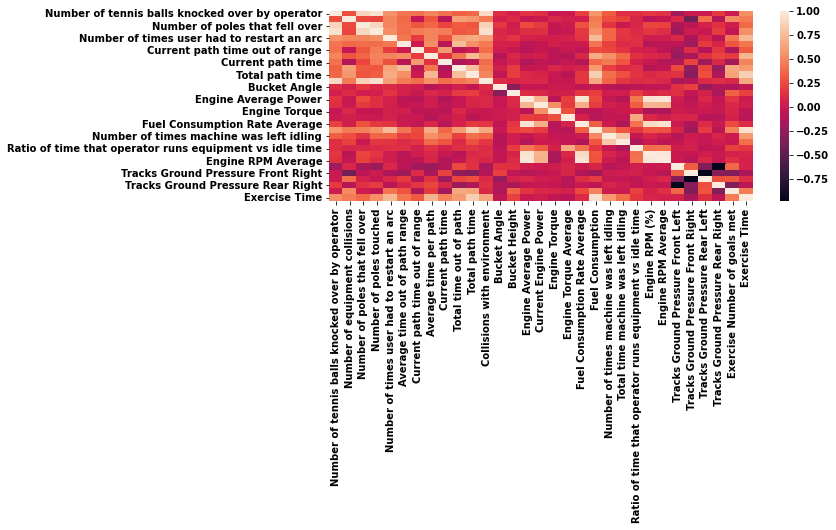

In [196]:
sns.heatmap(data_corr)

In [197]:
corr_columns = []
for i in range(len(data_corr)):
    for j in range(i+1, len(data_corr)):
        if abs(data_corr.iloc[i,j]) > 0.97 and data_corr.columns[j] not in corr_columns:
            corr_columns.append(data_corr.columns[j])

print(f"Total Correlated features: {len(corr_columns)}") 
print(f"Correlated features: {corr_columns}")  

data.drop(columns=corr_columns, inplace=True)          
print(f"Total Final Features: {len(data.columns[3:])}")

Total Correlated features: 3
Correlated features: ['Engine RPM Average', 'Tracks Ground Pressure Rear Right', 'Tracks Ground Pressure Rear Left']
Total Final Features: 28


In [198]:
print(f"Final Features for training: {data.columns[3:]}")

Final Features for training: Index(['Number of tennis balls knocked over by operator',
       'Number of equipment collisions', 'Number of poles that fell over',
       'Number of poles touched', 'Number of times user had to restart an arc',
       'Average time out of path range', 'Current path time out of range',
       'Average time per path', 'Current path time', 'Total time out of path',
       'Total path time', 'Collisions with environment', 'Bucket Angle',
       'Bucket Height', 'Engine Average Power', 'Current Engine Power',
       'Engine Torque', 'Engine Torque Average',
       'Fuel Consumption Rate Average', 'Fuel Consumption',
       'Number of times machine was left idling',
       'Total time machine was left idling',
       'Ratio of time that operator runs equipment vs idle time',
       'Engine RPM (%)', 'Tracks Ground Pressure Front Left',
       'Tracks Ground Pressure Front Right', 'Exercise Number of goals met',
       'Exercise Time'],
      dtype='object')


In [199]:
data["reward"] = ""
data["Quality of Action"] = ""

In [200]:
def reward_normalizel():
    
    data["reward"] = data["Current trainee score at that time"][:] - 100
    for sess in data["Session id"].unique():
        test_cond = (data["Session id"]==sess)
        indx = data.index[test_cond].tolist()
        succes = data["reward"][indx[1:]].tolist()
        predec = data["reward"][indx[:-1]].tolist()
        output = list(np.array(succes)-np.array(predec))
        data["reward"][indx[1:]] = output
    
    data.loc[(data["reward"]==0),"Quality of Action"] = "good"
    data.loc[(data["reward"]<0),"Quality of Action"] = "bad"
        
reward_normalizel()    

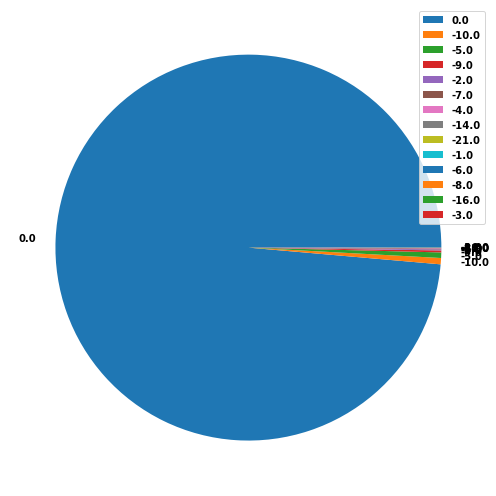

In [201]:
value = data["reward"].value_counts().tolist()
label = data["reward"].value_counts().index.tolist()
fig = plt.figure(figsize =(10, 7))
patches, texts = plt.pie(value, labels=label)
plt.legend(patches, label, loc="best")
plt.show()

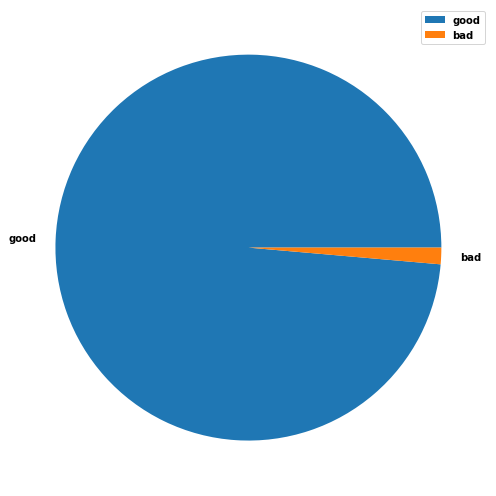

In [202]:
value = data["Quality of Action"].value_counts().tolist()
label = data["Quality of Action"].value_counts().index.tolist()
fig = plt.figure(figsize =(10, 7))
patches, texts = plt.pie(value, labels=label)
plt.legend(patches, label, loc="best")
plt.show()

In [203]:
data.to_csv("features_to_train.csv", index=False)        